<a href="https://colab.research.google.com/github/nkrish04/Image_Classification/blob/main/Copy_of_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import Sequential
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import PIL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# WE USED SPLIT-FOLDER LIBRARY TO SPILT THE DATASET INTO TRAINIG SET, VALIDATION SET AND TEST SET. WE USED

# splitfolders.ratio('PlantVillage', output="output", seed=1337, ratio=(.7, .2, .1), group_prefix=None, move=False)

In [ ]:
image_size = (256, 256)
img_height = 256
img_width = 256

In [ ]:
train = keras.preprocessing.image_dataset_from_directory(
   '/content/drive/MyDrive/ml/output/train',
    labels='inferred',
    label_mode='int',
    shuffle=True,
    image_size = (256,256),
)

val = keras.preprocessing.image_dataset_from_directory(
   '/content/drive/MyDrive/ml/output/val',
    labels='inferred',
    label_mode='int',
    shuffle=True,
    image_size = (256,256),
)

test = keras.preprocessing.image_dataset_from_directory(
   '/content/drive/MyDrive/ml/output/test',
    label_mode='int',
    shuffle=True,
    image_size = (256,256),
)


Found 14437 files belonging to 15 classes.
Found 4121 files belonging to 15 classes.
Found 2075 files belonging to 15 classes.


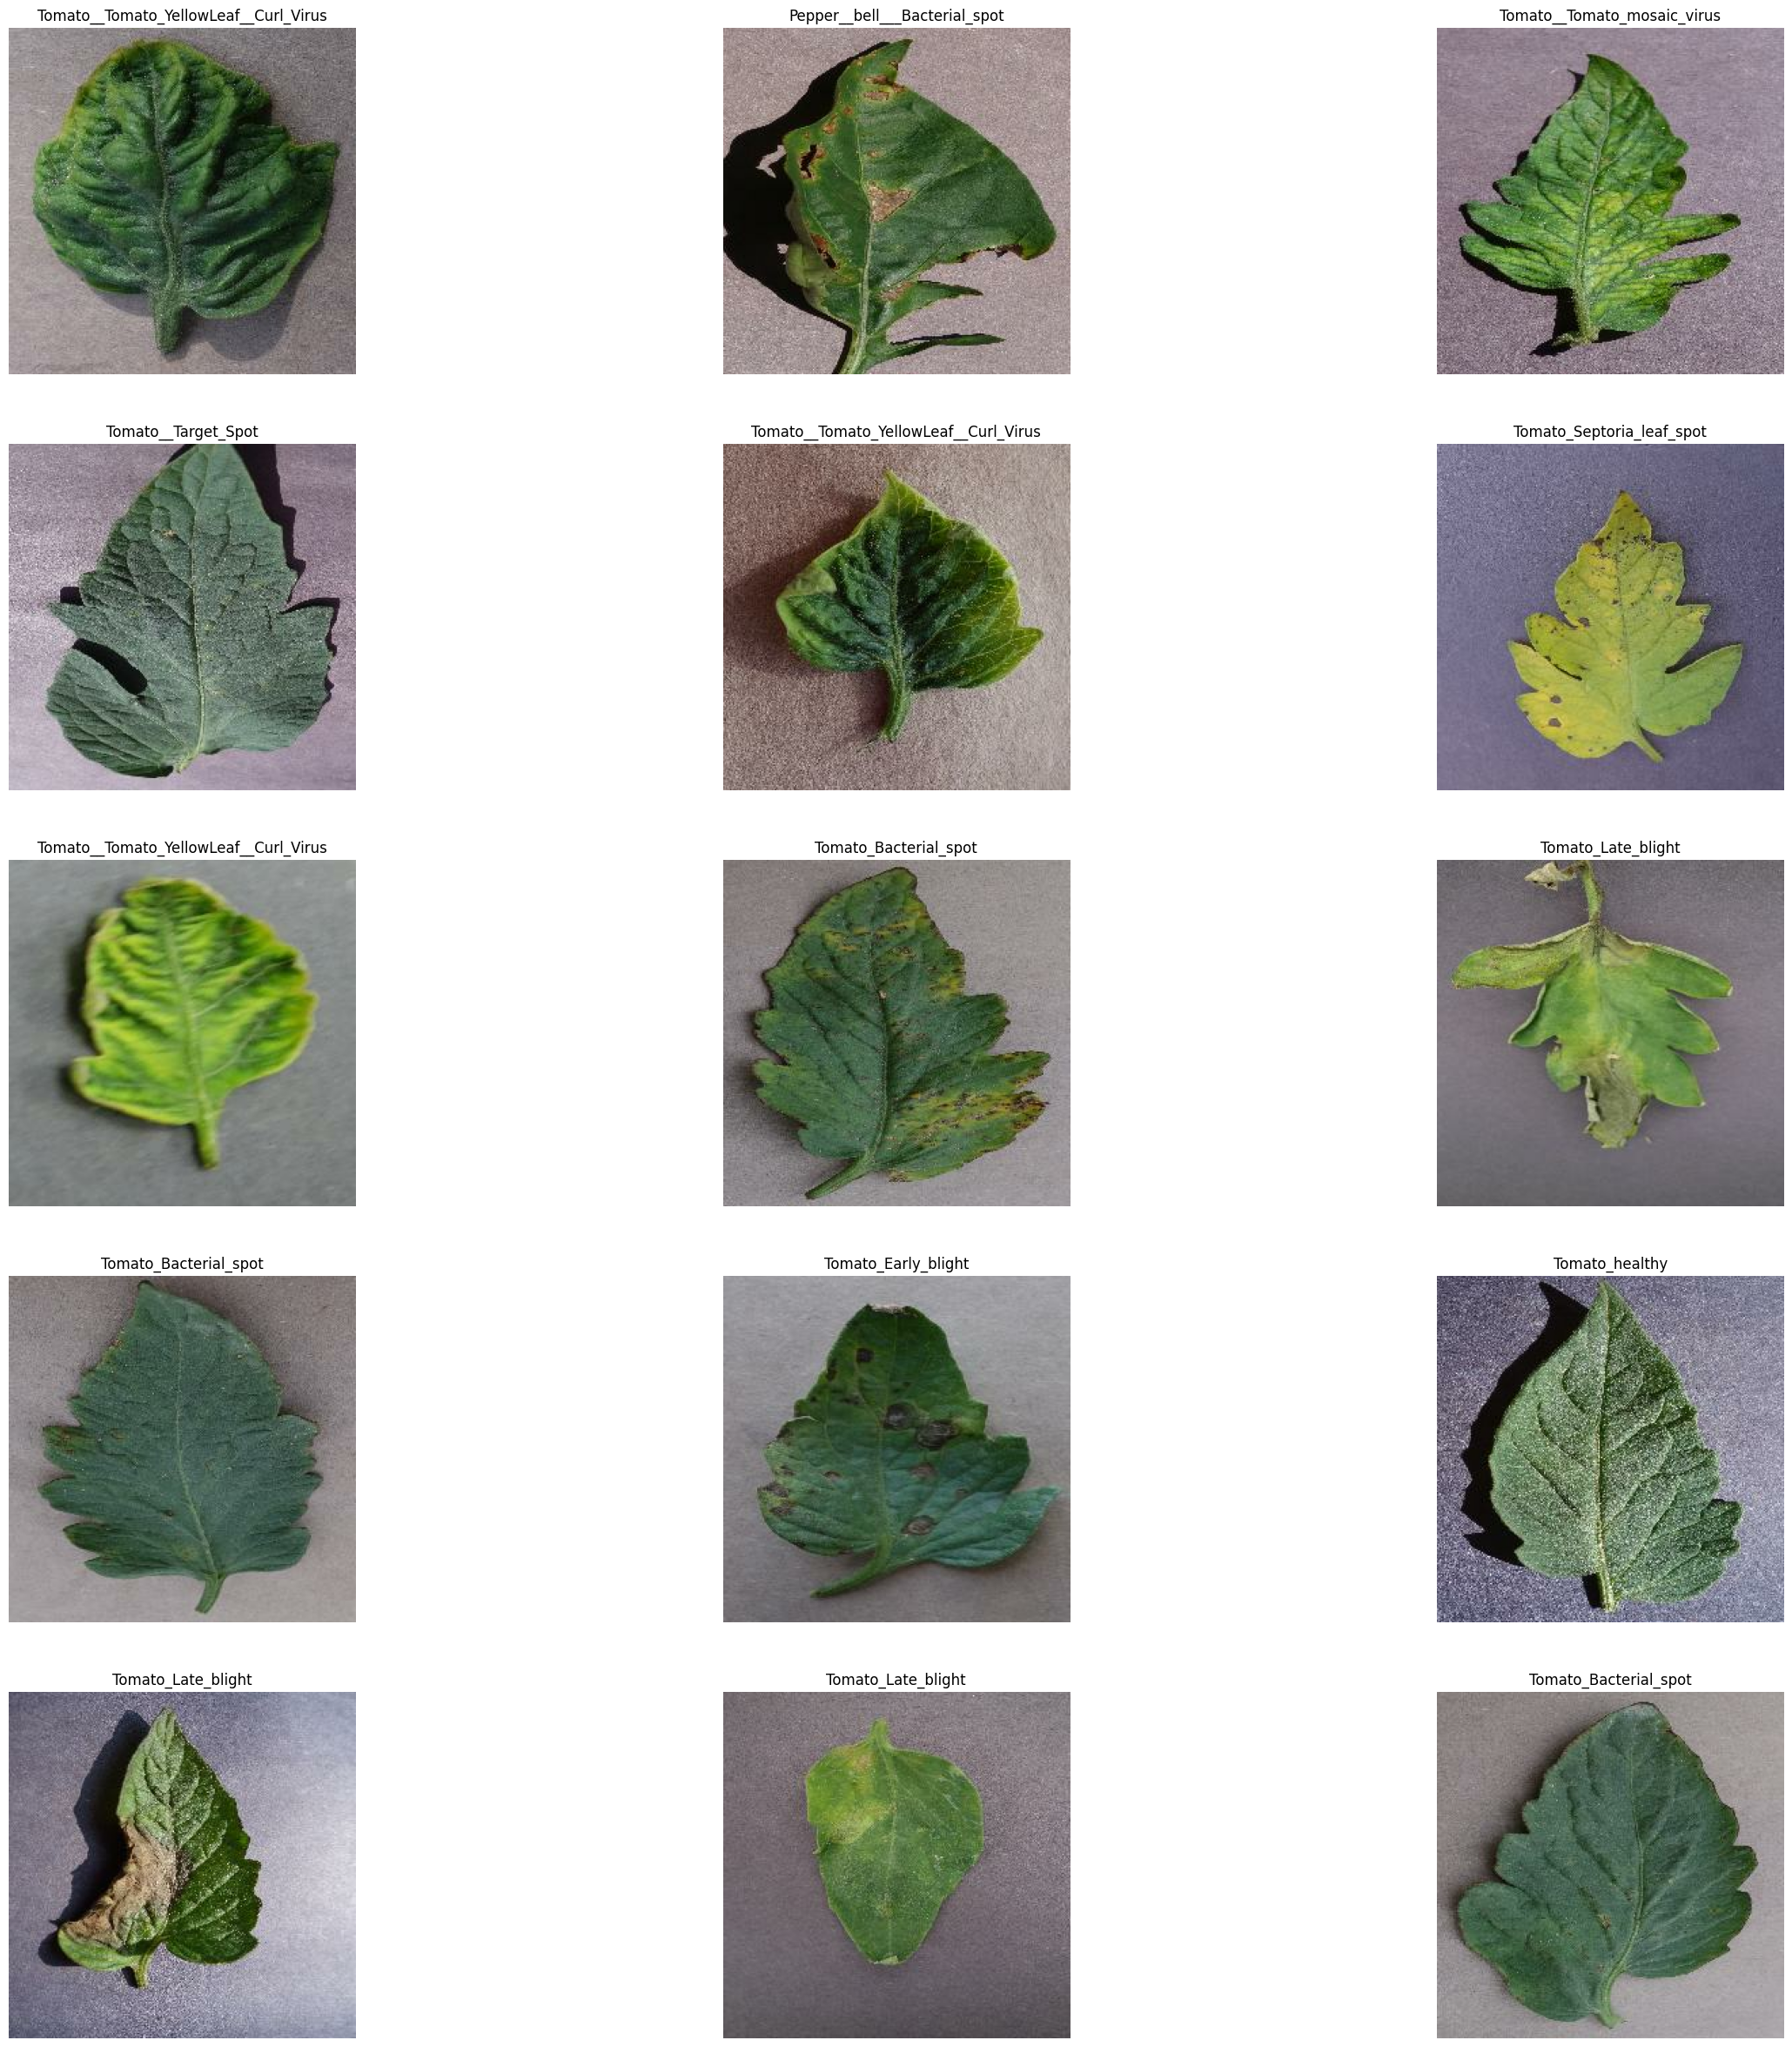

In [ ]:
class_names = train.class_names

plt.figure(figsize=(30, 30))
for images, labels in train.take(1):
    for i in range(15):
        ax = plt.subplot(5, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")



In [ ]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.5),
    layers.RandomZoom(-0.2,0.2),
  ]
)

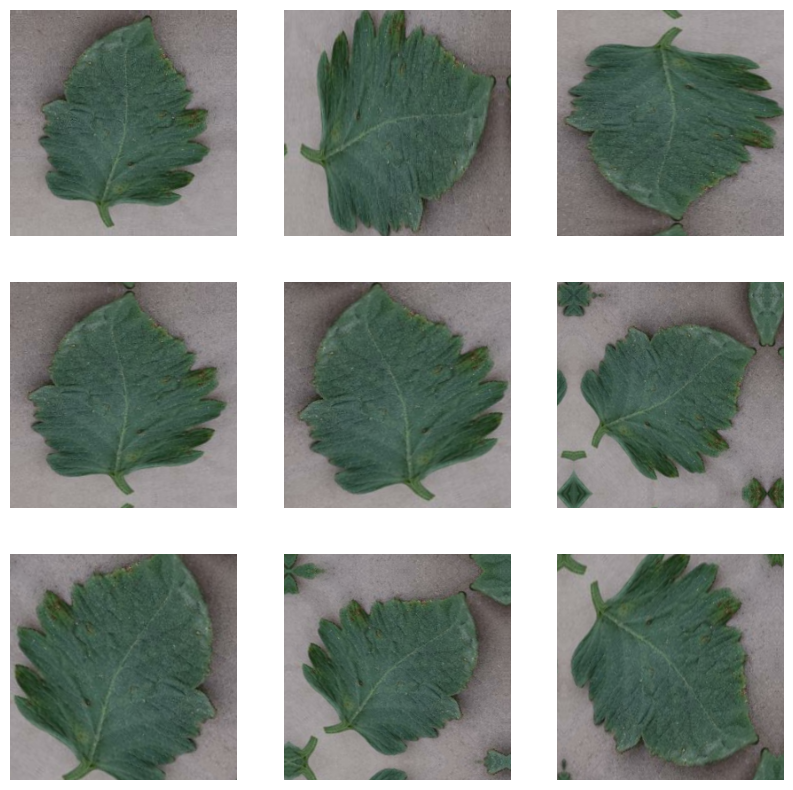

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train.take(
    1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)
input_shape = (32,img_height,img_width,3)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 6, padding="same", activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding="same", activation='relu'),
  layers.Conv2D(32, 3, padding="same", activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding="same", activation='relu'),
  layers.Conv2D(64, 3, padding="same", activation='relu'),
  layers.Conv2D(64, 3, padding="same", activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding="same", activation='relu'),
  layers.Conv2D(128, 3, padding="same", activation='relu'),
  layers.Conv2D(128, 3, padding="same", activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding="same", activation='relu'),
  layers.Conv2D(128, 3, padding="same", activation='relu'),
  layers.Conv2D(128, 3, padding="same", activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.build(input_shape=input_shape)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_51 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 conv2d_53 (Conv2D)          (None, 128, 128, 32)      9248      
                                                      

In [ ]:
epochs = 15
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
452/452 [==============================] - 351s 721ms/step - loss: 2.3070 - accuracy: 0.2377 - val_loss: 2.0955 - val_accuracy: 0.3048
Epoch 2/15
452/452 [==============================] - 319s 705ms/step - loss: 1.6702 - accuracy: 0.4457 - val_loss: 1.6750 - val_accuracy: 0.4266
Epoch 3/15
452/452 [==============================] - 319s 706ms/step - loss: 1.3767 - accuracy: 0.5408 - val_loss: 1.5445 - val_accuracy: 0.4931
Epoch 4/15
452/452 [==============================] - 318s 703ms/step - loss: 1.0760 - accuracy: 0.6368 - val_loss: 1.1391 - val_accuracy: 0.6042
Epoch 5/15
452/452 [==============================] - 324s 717ms/step - loss: 0.8917 - accuracy: 0.6898 - val_loss: 1.2564 - val_accuracy: 0.6103
Epoch 6/15
452/452 [==============================] - 323s 715ms/step - loss: 0.7690 - accuracy: 0.7328 - val_loss: 1.3963 - val_accuracy: 0.5894
Epoch 7/15
452/452 [==============================] - 323s 714ms/step - loss: 0.6895 - accuracy: 0.7581 - val_loss: 0.7640 -

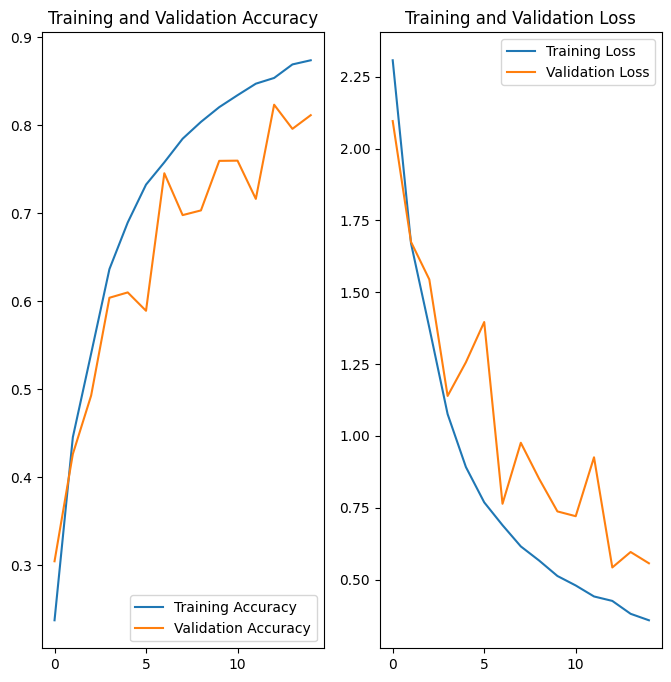

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'model' is not defined

AttributeError: module 'keras.api._v2.keras' has no attribute 'ops'

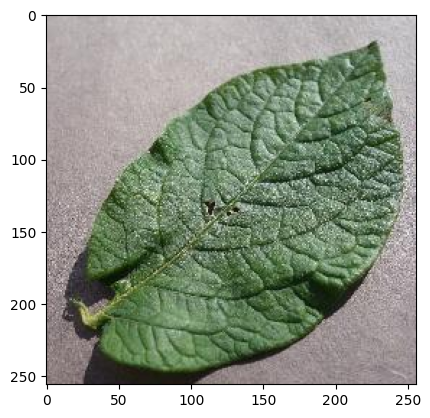

In [ ]:
# img = keras.utils.load_img("/content/drive/MyDrive/ml/output/test/Potato___healthy/a3ec91aa-8503-4711-a912-0d1427e25686___RS_HL 5409.JPG", target_size=image_size)
# plt.imshow(img)

# img_array = keras.utils.img_to_array(img)
# img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# # score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score))
# )